In [1566]:
#import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#read data
df_vehicle_coupon = pd.read_csv("data/coupon.csv")
#get columns and data types
df_vehicle_coupon.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [1392]:
#get first few rows 
df_vehicle_coupon.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [1394]:
#get statistical summary of numerical columns
df_vehicle_coupon.describe()

,temperature,has_children,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [1396]:
#drop duplicates
a = len(df_vehicle_coupon)
df_vehicle_coupon = df_vehicle_coupon.drop_duplicates()
b = len(df_vehicle_coupon)
rows_removed = a-b
print(f"Duplicates removed:{rows_removed}")

Duplicates removed:74


In [1398]:
#get count of missing values in each column
df_vehicle_coupon.isnull().sum()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12502
Bar                       107
CoffeeHouse               217
CarryAway                 150
RestaurantLessThan20      129
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [1400]:
for column in df_vehicle_coupon.columns:
    print(f"Value counts for column '{column}':")
    print(df_vehicle_coupon[column].value_counts(dropna=False))
    print()

Value counts for column 'destination':
destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64

Value counts for column 'passanger':
passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

Value counts for column 'weather':
weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64

Value counts for column 'temperature':
temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

Value counts for column 'time':
time
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: count, dtype: int64

Value counts for column 'coupon':
coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

Value counts for column 'expiration':
expiration
1d    7031
2h    5579
Name: count, dtype: int64

Value counts for column 'gender':

In [1402]:
#replace blanks with Nan
df_vehicle_coupon['car']=df_vehicle_coupon['car'].replace(' ', np.nan)
df_vehicle_coupon['Bar']=df_vehicle_coupon['Bar'].replace(' ', np.nan)
df_vehicle_coupon['CoffeeHouse'] = df_vehicle_coupon['CoffeeHouse'].replace(' ', np.nan)
df_vehicle_coupon['CarryAway'] = df_vehicle_coupon['CarryAway'].replace(' ', np.nan)
df_vehicle_coupon['RestaurantLessThan20'] = df_vehicle_coupon['RestaurantLessThan20'].replace(' ', np.nan)
df_vehicle_coupon['Restaurant20To50'] = df_vehicle_coupon['Restaurant20To50'].replace(' ', np.nan)

In [1404]:
#replace NaN with Unknown
df_vehicle_coupon['car'] = df_vehicle_coupon['car'].replace(np.nan, 'Unknown')
df_vehicle_coupon['Bar'] = df_vehicle_coupon['Bar'].replace(np.nan, 'Unknown')
df_vehicle_coupon['CoffeeHouse'] = df_vehicle_coupon['CoffeeHouse'].replace(np.nan, 'Unknown')
df_vehicle_coupon['CarryAway'] = df_vehicle_coupon['CarryAway'].replace(np.nan, 'Unknown')
df_vehicle_coupon['RestaurantLessThan20'] = df_vehicle_coupon['RestaurantLessThan20'].replace(np.nan, 'Unknown')
df_vehicle_coupon['Restaurant20To50'] = df_vehicle_coupon['Restaurant20To50'].replace(np.nan, 'Unknown')

In [1406]:
#get column datatypes
df_vehicle_coupon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12610 non-null  object
 1   passanger             12610 non-null  object
 2   weather               12610 non-null  object
 3   temperature           12610 non-null  int64 
 4   time                  12610 non-null  object
 5   coupon                12610 non-null  object
 6   expiration            12610 non-null  object
 7   gender                12610 non-null  object
 8   age                   12610 non-null  object
 9   maritalStatus         12610 non-null  object
 10  has_children          12610 non-null  int64 
 11  education             12610 non-null  object
 12  occupation            12610 non-null  object
 13  income                12610 non-null  object
 14  car                   12610 non-null  object
 15  Bar                   12610 non-null  obj

In [1408]:
#convert columns with limited unique values to datatype category
df_vehicle_coupon['coupon'] = df_vehicle_coupon['coupon'].astype('category')
df_vehicle_coupon['gender'] = df_vehicle_coupon['gender'].astype('category')
df_vehicle_coupon['maritalStatus'] = df_vehicle_coupon['maritalStatus'].astype('category')
df_vehicle_coupon['education'] = df_vehicle_coupon['education'].astype('category')
df_vehicle_coupon['occupation'] = df_vehicle_coupon['occupation'].astype('category')

In [1410]:
df_vehicle_coupon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  object  
 1   passanger             12610 non-null  object  
 2   weather               12610 non-null  object  
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  object  
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  object  
 7   gender                12610 non-null  category
 8   age                   12610 non-null  object  
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  object  
 14  car                   12610 non-null  object  
 15  Bar    

In [1412]:
#check count of missing values in each column after data defaulting
df_vehicle_coupon.isnull().sum()


destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [429]:
for column in df_vehicle_coupon.columns:
    print(f"Value counts for column '{column}':")
    print(df_vehicle_coupon[column].value_counts(dropna=False))
    print()

Value counts for column 'destination':
destination
No Urgent Place    6266
Home               3230
Work               3114
Name: count, dtype: int64

Value counts for column 'passanger':
passanger
Alone        7248
Friend(s)    3292
Partner      1069
Kid(s)       1001
Name: count, dtype: int64

Value counts for column 'weather':
weather
Sunny    10011
Snowy     1397
Rainy     1202
Name: count, dtype: int64

Value counts for column 'temperature':
temperature
80    6475
55    3830
30    2305
Name: count, dtype: int64

Value counts for column 'time':
time
6PM     3220
7AM     3114
10AM    2271
2PM     2006
10PM    1999
Name: count, dtype: int64

Value counts for column 'coupon':
coupon
Coffee House             3989
Restaurant(<20)          2779
Carry out & Take away    2344
Bar                      2010
Restaurant(20-50)        1488
Name: count, dtype: int64

Value counts for column 'expiration':
expiration
1d    7031
2h    5579
Name: count, dtype: int64

Value counts for column 'gender':

In [1414]:
#convert columns from object to string
df_vehicle_coupon['age'] = df_vehicle_coupon['age'].astype('string')
df_vehicle_coupon['time'] = df_vehicle_coupon['time'].astype('string')
df_vehicle_coupon['income'] = df_vehicle_coupon['income'].astype('category')
df_vehicle_coupon['car'] = df_vehicle_coupon['car'].astype('string')
df_vehicle_coupon['Bar'] = df_vehicle_coupon['Bar'].astype('string')
df_vehicle_coupon['CoffeeHouse'] = df_vehicle_coupon['CoffeeHouse'].astype('string')
df_vehicle_coupon['CarryAway'] = df_vehicle_coupon['CarryAway'].astype('string')
df_vehicle_coupon['RestaurantLessThan20'] = df_vehicle_coupon['RestaurantLessThan20'].astype('string')
df_vehicle_coupon['Restaurant20To50'] = df_vehicle_coupon['Restaurant20To50'].astype('string')

In [1416]:
df_vehicle_coupon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  object  
 1   passanger             12610 non-null  object  
 2   weather               12610 non-null  object  
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  string  
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  object  
 7   gender                12610 non-null  category
 8   age                   12610 non-null  string  
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  category
 14  car                   12610 non-null  string  
 15  Bar    

In [1418]:
df_vehicle_coupon.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
car                     0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

In [1422]:
total_observation = df_vehicle_coupon['Y'].sum()
print(total_observation)
total_count = len(df_vehicle_coupon['Y'])
print(total_count)
proportion_accepted = total_observation/total_count
print(f"Proportion of coupon acceptances:{proportion_accepted*100:.2f}%")


7157
12610
Proportion of coupon acceptances:56.76%


In [1506]:
df_coupon_cnt = df_vehicle_coupon['coupon'].value_counts().reset_index()
print(df_coupon)

                  coupon         Y
0                    Bar  0.409950
1  Carry out & Take away  0.733788
2           Coffee House  0.498621
3      Restaurant(20-50)  0.441532
4        Restaurant(<20)  0.707809


In [1508]:
df_coupon_mn = df_vehicle_coupon.groupby('coupon', observed=False)[['Y']].mean().reset_index()
print(df_coupon)


                  coupon         Y
0                    Bar  0.409950
1  Carry out & Take away  0.733788
2           Coffee House  0.498621
3      Restaurant(20-50)  0.441532
4        Restaurant(<20)  0.707809


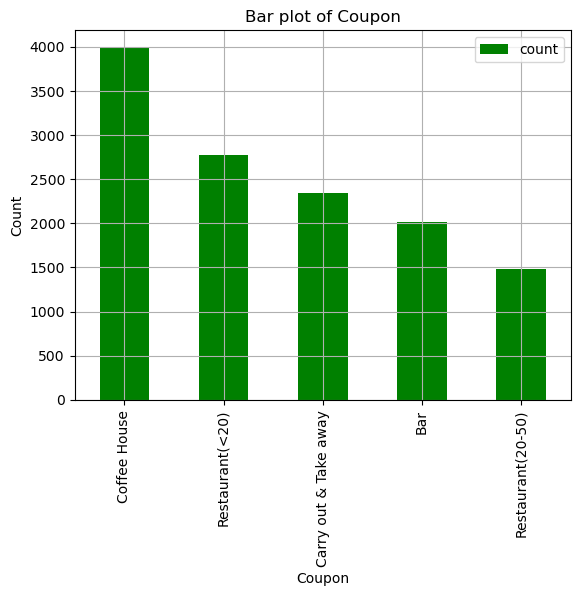

<Figure size 640x480 with 0 Axes>

In [1510]:
df_coupon_cnt.plot(kind='bar',x='coupon',y='count',color='green')
plt.xlabel('Coupon')
plt.ylabel('Count')
plt.grid(True)
plt.title("Bar plot of " + 'Coupon')
plt.show()
plt.savefig('Coupon Bar Plot')

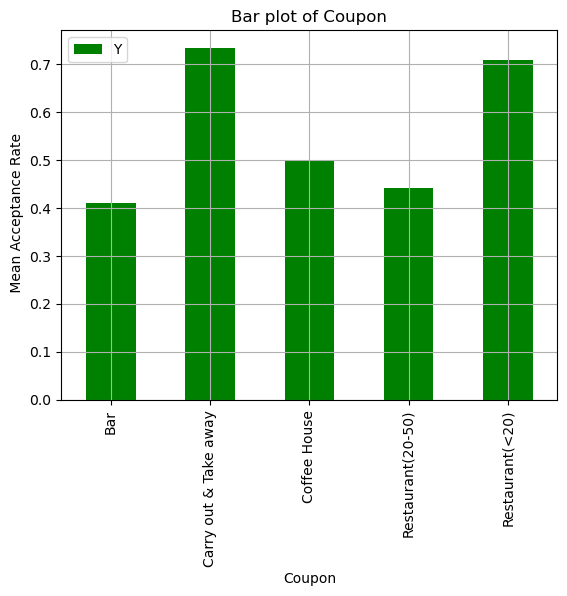

<Figure size 640x480 with 0 Axes>

In [1500]:
df_coupon_mn.plot(kind='bar',x='coupon',y='Y',color='green')
plt.xlabel('Coupon')
plt.ylabel(" Mean Acceptance Rate")
plt.grid(True)
plt.title("Bar plot of " + 'Coupon')
plt.show()
plt.savefig('Coupon Bar Plot2')


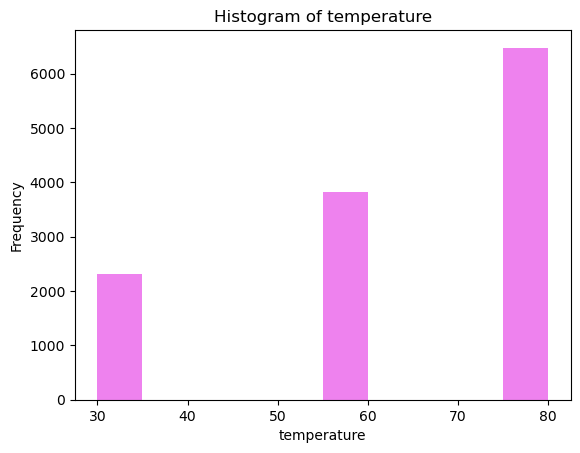

<Figure size 640x480 with 0 Axes>

In [1428]:
plt.hist(df_vehicle_coupon['temperature'],color = 'violet')
plt.xlabel('temperature')
plt.ylabel("Frequency")
plt.title("Histogram of " + 'temperature')
plt.show()
plt.savefig('Temperature Histogram')

In [1430]:
#convert int to bool for easy grouping 
df_vehicle_coupon['Y'] = df_vehicle_coupon['Y'].astype('bool')
df_vehicle_coupon['Y'] =df_vehicle_coupon['Y'].replace({1:True,0:False})
df_vehicle_coupon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12610 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12610 non-null  object  
 1   passanger             12610 non-null  object  
 2   weather               12610 non-null  object  
 3   temperature           12610 non-null  int64   
 4   time                  12610 non-null  string  
 5   coupon                12610 non-null  category
 6   expiration            12610 non-null  object  
 7   gender                12610 non-null  category
 8   age                   12610 non-null  string  
 9   maritalStatus         12610 non-null  category
 10  has_children          12610 non-null  int64   
 11  education             12610 non-null  category
 12  occupation            12610 non-null  category
 13  income                12610 non-null  category
 14  car                   12610 non-null  string  
 15  Bar    

In [1520]:
#get total rows with coupon = Bar
df_bar1 = df_vehicle_coupon.loc[(df_vehicle_coupon['coupon'] == "Bar")]
# Calculate the proportion of acceptance (Y == 1) for "Bar" coupon
proportion_bar_accepted = df_bar1['Y'].mean()

# Display the result as percentage
print(f"Proportion of 'Bar' coupon accepted: {proportion_bar_accepted * 100:.2f}%")


Proportion of 'Bar' coupon accepted: 41.00%


In [1438]:
df_bar_cnt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 13 to 12652
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           824 non-null    object  
 1   passanger             824 non-null    object  
 2   weather               824 non-null    object  
 3   temperature           824 non-null    int64   
 4   time                  824 non-null    string  
 5   coupon                824 non-null    category
 6   expiration            824 non-null    object  
 7   gender                824 non-null    category
 8   age                   824 non-null    string  
 9   maritalStatus         824 non-null    category
 10  has_children          824 non-null    int64   
 11  education             824 non-null    category
 12  occupation            824 non-null    category
 13  income                824 non-null    category
 14  car                   824 non-null    string  
 15  Bar     

In [1440]:
df_bar_cnt.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,Unknown,4~8,1~3,1,0,0,1,0,True
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,True
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,True
39,Work,Alone,Sunny,55,7AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,1,0,1,True
75,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Male,46,Married partner,...,1~3,1~3,1~3,less1,1,1,0,0,1,True


Acceptance Rate for Group 1 (Bar visits < 3): 37.04%
Acceptance Rate for Other Groups 1: 73.18%
Acceptance Rate for Group 2 (Bar visits > 1, age > 25): 69.52%
Acceptance Rate for Other Groups 2: 33.46%
Acceptance Rate for Group 3 (Bar visits < 3,passengers not kids,occupation not Farming Fishing & Forestry): 71.32%
Acceptance Rate for Other Groups 3: 29.54%


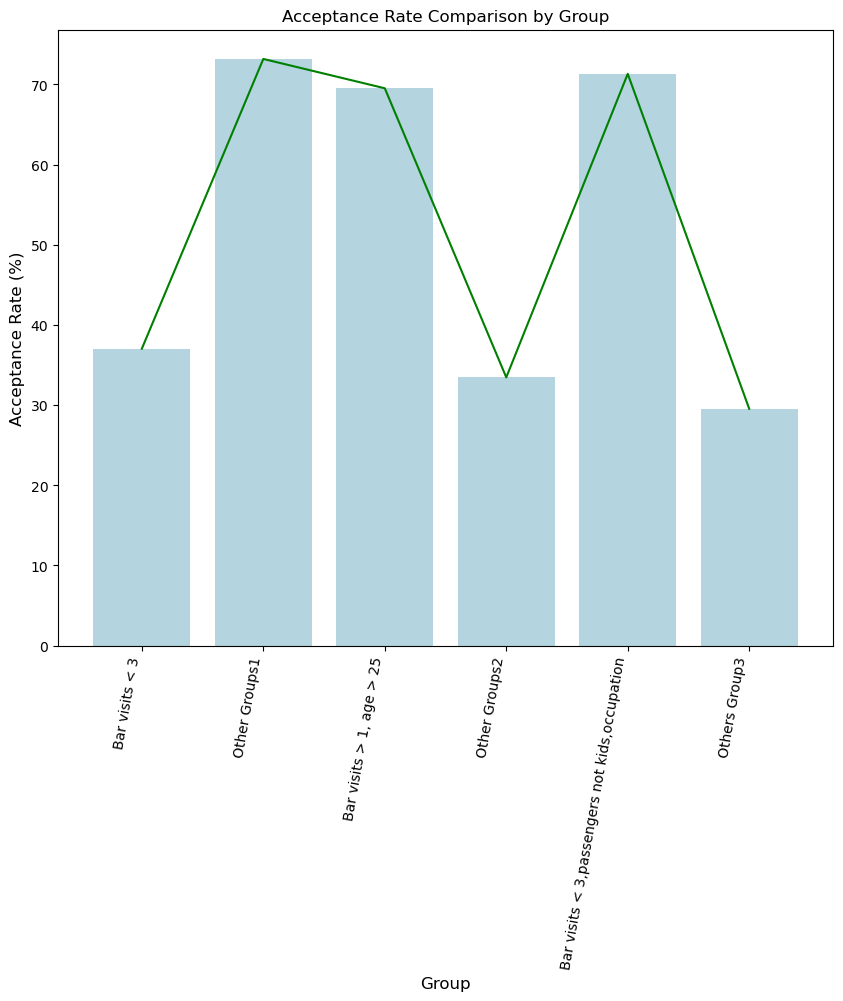

<Figure size 640x480 with 0 Axes>

In [1542]:
#get acceptance rate between those who went to bar 3 or fewer times a month to those who went more 
Group_1 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (df_vehicle_coupon['Bar'].isin(['1~3','less1','never']))   
]
#other than group_1
Group_other1 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (~(df_vehicle_coupon['Bar'].isin(['1~3','less1','never'])))  
]
#get acceptance rate between those who went to bar 1 or more times a month to those who went more and age > 25
Group_2 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8'])) & 
    (df_vehicle_coupon['age'] > '25')& 
                 (~(df_vehicle_coupon['age'].isin(['below21'])))
]
#other groups than group_2
Group_other2 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (~((df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8'])) & 
    (df_vehicle_coupon['age'] > '25')& 
                 (~(df_vehicle_coupon['age'].isin(['below21']))))) 
]
#get acceptance rate between drivers who go to bars more 
#than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.
Group_3 = df_vehicle_coupon.loc[
        (df_vehicle_coupon['coupon'] == "Bar") &
        (df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8']))&
        (df_vehicle_coupon['passanger'] != 'Kid(s)') & 
        (df_vehicle_coupon['occupation'] !='Farming Fishing & Forestry')
]
#other groups than group_3
Group_other3 = df_vehicle_coupon.loc[
        (df_vehicle_coupon['coupon'] == "Bar") &
        (~((df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8']))&
        (df_vehicle_coupon['passanger'] != 'Kid(s)') & 
        (df_vehicle_coupon['occupation'] !='Farming Fishing & Forestry')))
]
acceptance_rate_1 = Group_1['Y'].mean() * 100 
acceptance_rate_1_1 = Group_other1['Y'].mean() * 100               
acceptance_rate_2 = Group_2['Y'].mean() * 100
acceptance_rate_2_1 = Group_other2['Y'].mean() * 100
acceptance_rate_3 = Group_3['Y'].mean() * 100
acceptance_rate_3_1 = Group_other3['Y'].mean() * 100

print(f"Acceptance Rate for Group 1 (Bar visits < 3): {acceptance_rate_1:.2f}%")
print(f"Acceptance Rate for Other Groups 1: {acceptance_rate_1_1:.2f}%")
print(f"Acceptance Rate for Group 2 (Bar visits > 1, age > 25): {acceptance_rate_2:.2f}%")
print(f"Acceptance Rate for Other Groups 2: {acceptance_rate_2_1:.2f}%")
print(f"Acceptance Rate for Group 3 (Bar visits < 3,passengers not kids,occupation not Farming Fishing & Forestry): {acceptance_rate_3:.2f}%")
print(f"Acceptance Rate for Other Groups 3: {acceptance_rate_3_1:.2f}%")

acceptance_rates = pd.DataFrame({
    'Group': ['Bar visits < 3', 'Other Groups1', 'Bar visits > 1, age > 25','Other Groups2','Bar visits < 3,passengers not kids,occupation','Others Group3'],
    'Acceptance Rate (%)': [acceptance_rate_1, acceptance_rate_1_1, acceptance_rate_2,acceptance_rate_2_1, acceptance_rate_3,acceptance_rate_3_1]
})
acceptance_rates

plt.figure(figsize=(10, 8))
sns.barplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates,color = 'lightblue')
sns.lineplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates,color = 'green')
# Add title and labels
plt.title('Acceptance Rate Comparison by Group', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=80, ha='right')
plt.show()
plt.savefig('Bar Coupon Acceptance rate by Group')

Acceptance Rate for Group 1 (Bar visits < 3,passanger,maritalstatus): 71.32%
Acceptance Rate for Group 2 (Bar visits > 1, age < 30): 72.17%
Acceptance Rate for Group 3 (Restaurant visit > 4 ,income < 50K): 60.03%


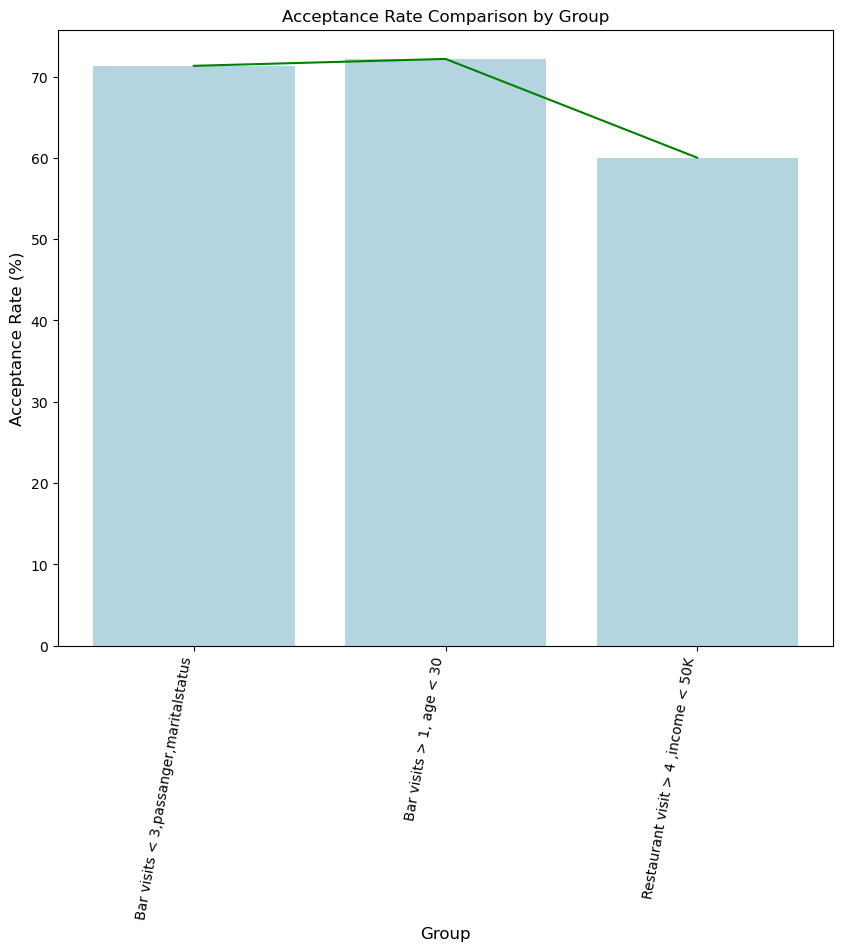

<Figure size 640x480 with 0 Axes>

In [1554]:

# group to get acceptance rate between those who went to bar 1 or more times a month, passangers who are not kids and marital status not widowed
condition_1 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['passanger'] != 'Kid(s)') &
    (df_vehicle_coupon['maritalStatus'] != 'Widowed')
]
# group to get acceptance rate between those who went to bar 1 or more times a month, age < 30
condition_2 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Bar") &
    (df_vehicle_coupon['Bar'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['age'].isin(['below21','21','26']))
]
# group to get acceptance rate for drivers who visited cheap restaurants more then 4 times a month
condition_3 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['RestaurantLessThan20'] .isin(['4~8','gt8'])) &
    (df_vehicle_coupon['income'].isin(['Less than $12500' ,'$12500 - $24999' ,'$25000 - $37499','$37500 - $49999']))
]

acceptance_rate_4 = condition_1['Y'].mean() * 100 
               
acceptance_rate_5 = condition_2['Y'].mean() * 100

acceptance_rate_6 = condition_3['Y'].mean() * 100


print(f"Acceptance Rate for Group 1 (Bar visits < 3,passanger,maritalstatus): {acceptance_rate_4:.2f}%")

print(f"Acceptance Rate for Group 2 (Bar visits > 1, age < 30): {acceptance_rate_5:.2f}%")

print(f"Acceptance Rate for Group 3 (Restaurant visit > 4 ,income < 50K): {acceptance_rate_6:.2f}%")

acceptance_rates_1 = pd.DataFrame({
    'Group': ['Bar visits < 3,passanger,maritalstatus', 'Bar visits > 1, age < 30','Restaurant visit > 4 ,income < 50K'],
    'Acceptance Rate (%)': [acceptance_rate_4, acceptance_rate_5, acceptance_rate_6]
})
plt.figure(figsize=(10, 8))
sns.barplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates_1,color = 'lightblue')
sns.lineplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates_1,color = 'green')
# Add title and labels
plt.title('Acceptance Rate Comparison by Group', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=80, ha='right')
plt.show()
plt.savefig('Bar Coupon Acceptance rate by Group 4,5,6')


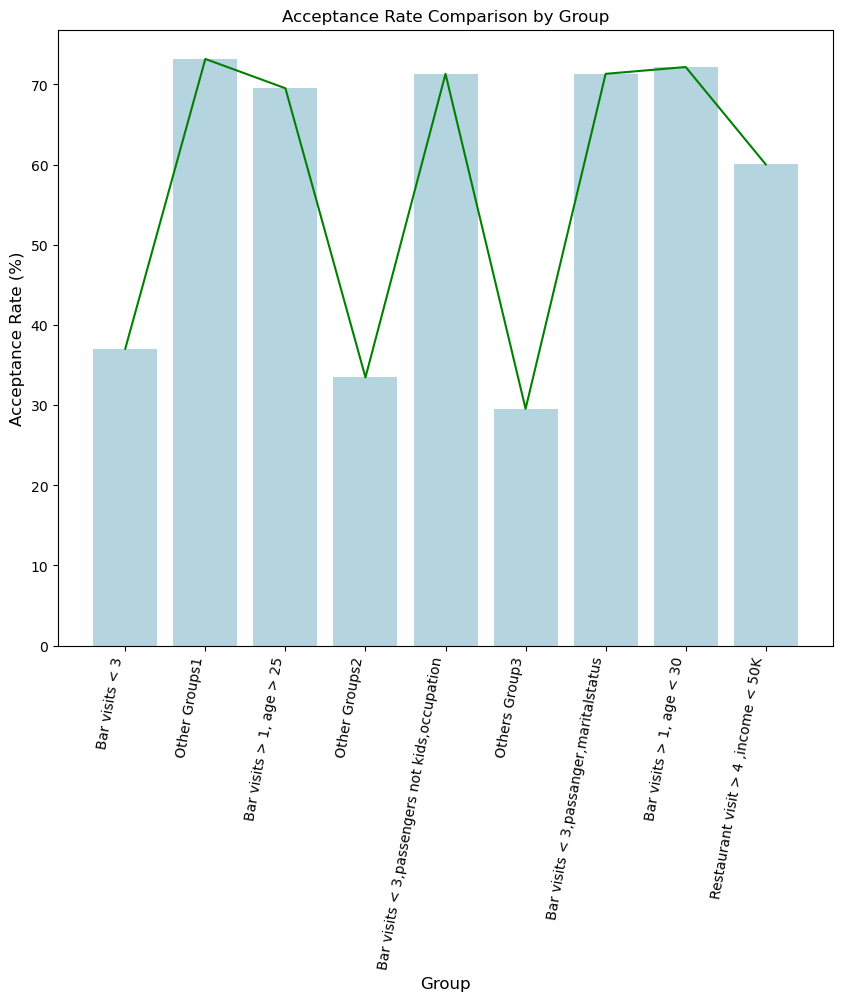

<Figure size 640x480 with 0 Axes>

In [1562]:
df_bar_coupon =pd.concat([acceptance_rates,acceptance_rates_1])
plt.figure(figsize=(10, 8))
sns.barplot(x='Group', y='Acceptance Rate (%)', data=df_bar_coupon,color = 'lightblue')
sns.lineplot(x='Group', y='Acceptance Rate (%)', data=df_bar_coupon,color = 'green')
# Add title and labels
plt.title('Acceptance Rate Comparison by Group', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=80, ha='right')
plt.show()
plt.savefig('Bar Coupon Acceptance rate -All Groups')


#Hypothesis: 
Mean acceptance rate differs slightly between different groups based on demography,marital status,occupation and a family.
Drivers who accepted bar coupons where tend to visit more than 1 time in  a month and are between age 25 and 30,not having kids and not widowed.


Data Analysis For CoffeeHouse Acceptance Rates:

Acceptance Rate for Condition 1 (CoffeeHouse visits > 1, Alone/Partner, non-widowed,home/work): 56.80%
Acceptance Rate for Other Groups 1: 47.89%
Acceptance Rate for Condition 2 (CoffeeHouse visits > 1, age < 30,education =Graduate): 71.43%
Acceptance Rate for Other Groups 2: 49.44%
Acceptance Rate for Condition 3 (Restaurant visits > 4, income < 50K): 60.03%


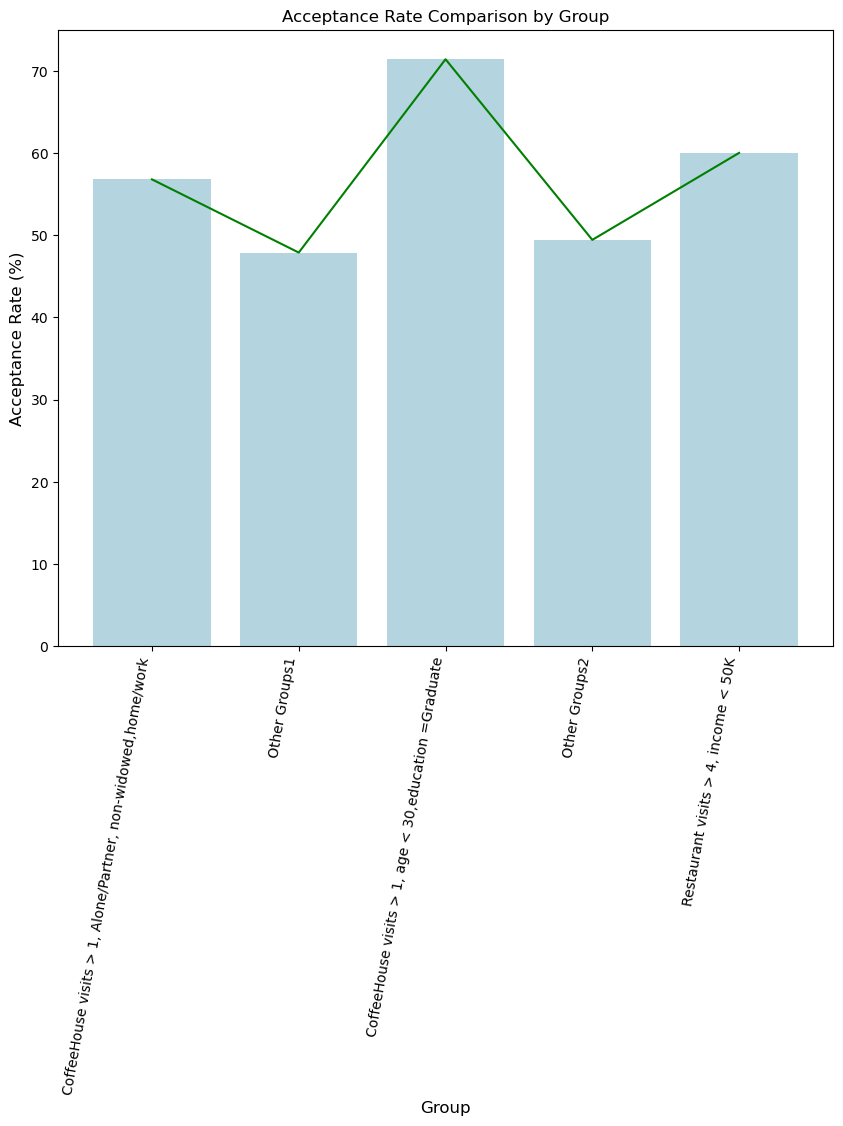

<Figure size 640x480 with 0 Axes>

In [1522]:

#  Filter CoffeeHouse coupon data for conditions
condition_3 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Coffee House") &
    (df_vehicle_coupon['CoffeeHouse'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['passanger'].isin(['Alone','Partner'])) &
    (df_vehicle_coupon['maritalStatus'] != 'Widowed') &
    (df_vehicle_coupon['destination'] != 'No Urgent Place')
]
condition_3_1 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Coffee House") & 
    (~((df_vehicle_coupon['CoffeeHouse'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['passanger'].isin(['Alone','Partner'])) &
    (df_vehicle_coupon['maritalStatus'] != 'Widowed') &
    (df_vehicle_coupon['destination'] != 'No Urgent Place')))
]

condition_4= df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Coffee House") &
    (df_vehicle_coupon['CoffeeHouse'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['age'].isin(['below21','21','26'])) & 
    (df_vehicle_coupon['education'] == "Graduate degree (Masters or Doctorate)")

]
condition_4_1= df_vehicle_coupon.loc[
    (df_vehicle_coupon['coupon'] == "Coffee House") &
    (~((df_vehicle_coupon['CoffeeHouse'].isin(['1~3','4~8','gt8'])) &
    (df_vehicle_coupon['age'].isin(['below21','21','26'])) &
    (df_vehicle_coupon['education'] == "Graduate degree (Masters or Doctorate)")))

]

condition_5 = df_vehicle_coupon.loc[
    (df_vehicle_coupon['RestaurantLessThan20'] .isin(['4~8','gt8'])) &
    (df_vehicle_coupon['income'].isin(['Less than $12500' ,'$12500 - $24999' ,'$25000 - $37499','$37500 - $49999']))
]

#calculate acceptance rates in percentage
acceptance_rate_1 = condition_3['Y'].mean() * 100 
acceptance_rate_1_1 = condition_3_1['Y'].mean() * 100               
acceptance_rate_2 = condition_4['Y'].mean() * 100
acceptance_rate_2_1 = condition_4_1['Y'].mean() * 100
acceptance_rate_3 = condition_5['Y'].mean() * 100

print(f"Acceptance Rate for Condition 1 (CoffeeHouse visits > 1, Alone/Partner, non-widowed,home/work): {acceptance_rate_1:.2f}%")
print(f"Acceptance Rate for Other Groups 1: {acceptance_rate_1_1:.2f}%")
print(f"Acceptance Rate for Condition 2 (CoffeeHouse visits > 1, age < 30,education =Graduate): {acceptance_rate_2:.2f}%")
print(f"Acceptance Rate for Other Groups 2: {acceptance_rate_2_1:.2f}%")
print(f"Acceptance Rate for Condition 3 (Restaurant visits > 4, income < 50K): {acceptance_rate_3:.2f}%")

acceptance_rates = pd.DataFrame({
    'Group': ['CoffeeHouse visits > 1, Alone/Partner, non-widowed,home/work', 'Other Groups1', 'CoffeeHouse visits > 1, age < 30,education =Graduate','Other Groups2','Restaurant visits > 4, income < 50K'],
    'Acceptance Rate (%)': [acceptance_rate_1, acceptance_rate_1_1, acceptance_rate_2,acceptance_rate_2_1, acceptance_rate_3]
})
acceptance_rates

plt.figure(figsize=(10, 8))
sns.barplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates,color = 'lightblue')
sns.lineplot(x='Group', y='Acceptance Rate (%)', data=acceptance_rates,color = 'green')
# Add title and labels
plt.title('Acceptance Rate Comparison by Group', fontsize=12)
plt.xlabel('Group', fontsize=12)

plt.ylabel('Acceptance Rate (%)', fontsize=12)
plt.xticks(rotation=80, ha='right')
plt.show()
plt.savefig('Coffee House Acceptance Rates plot')





Hypothesis for CoffeeHouse coupon Acceptance Rates:
Graduate drivers under the age of 30 ,visit coffee house more than once a month have significantly higher coupon acceptance rates than drivers who travel alone or with a partner, are non-widowed, who travel to home/work as well as drivers earning less than 50K visiting cheap restaurants.

Recommendations:
Understanding that this is survey data, require to determine cleaning and data standardization to determine accuracy on coupon category acceptance rates.
